In [300]:
# standard imports
import numpy as np
import matplotlib.pyplot as plt
# train-test split
from sklearn.model_selection import train_test_split

# CNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization,LeakyReLU
from tensorflow.keras import layers

# augmentation
import imgaug.augmenters as iaa

# image processing
from PIL import Image

# reloads module to update
import universal_methods
import importlib
importlib.reload(universal_methods)
from universal_methods import Universal # .py file with universal methods, that I use more than one time in this project

# For reproducibility
seed = 42
import random
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

## Data Acquisition

In [2]:
# with image size 150x150, that leads to significantly better results in modeling
X,y,class_labels=Universal().get_images(size=150)
class_labels

Found 2041 images belonging to 2 classes.


['fake', 'real']

Train test split. Splitting X_train twice to get validation set.

In [3]:
X_train_temp,X_test,y_train_temp,y_test=train_test_split(X,y,random_state=42,stratify=y,test_size=0.1)
X_train,X_val,y_train,y_val=train_test_split(X_train_temp,y_train_temp,random_state=42,stratify=y_train_temp,test_size=0.11)
X_train.shape,y_train.shape,X_val.shape,y_val.shape, X_test.shape,y_test.shape

((1634, 150, 150, 3),
 (1634,),
 (202, 150, 150, 3),
 (202,),
 (205, 150, 150, 3),
 (205,))

----
## Data Augmentation
First of all, let's try the vary basic augmentation technics, like resizing, rotation and flip. 

EDIT! If you have less number of training pairs, the results might not be good be because the model might overfit. We can increase the size of the dataset by applying random transformations on the images. We can change the color properties like hue, saturation, brightness, etc of the input images. We can also apply transformations such as rotation, scale, and flipping. For the transformations which change the location of the pixels, the segmentation image should also be transformed the same way.

In [190]:
# method to apply resize and rescale to training set.
IMG_SIZE = 120
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
]);

In [192]:
# method to apply rotation and flip to training set.
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

Building a model.

In [194]:
model_git=Sequential([
  # Add the preprocessing layers created earlier.
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # Rest of the model.
])
model_git.add(Conv2D(filters=8, kernel_size=(3, 3), padding='same', activation = 'relu',use_bias=True))
model_git.add(BatchNormalization())
model_git.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_git.add(Conv2D(8, (5, 5), padding='same', activation = 'relu',use_bias=True))
model_git.add(BatchNormalization())
model_git.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_git.add(Conv2D(16, (5, 5), padding='same', activation = 'relu',use_bias=True))
model_git.add(BatchNormalization())
model_git.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_git.add(Conv2D(16, (5, 5), padding='same', activation = 'relu',use_bias=True))
model_git.add(BatchNormalization())
model_git.add(MaxPooling2D(pool_size=(4, 4), padding='same'))
model_git.add(Flatten())
model_git.add(Dropout(0.5))
model_git.add(Dense(16,kernel_regularizer =tf.keras.regularizers.l2(l=0.01)))
model_git.add(LeakyReLU(alpha=0.1))
model_git.add(Dropout(0.5))
model_git.add(Dense(1, activation = 'sigmoid'))
model_git.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])
history_git=model_git.fit(X_train, y_train, batch_size = 128, epochs = 15, verbose = 1, validation_data = (X_val, y_val))


Epoch 1/15


2022-11-10 14:12:34.200555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - ETA: 0s - loss: 1.8441 - acc: 0.5073

2022-11-10 14:12:48.914079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 17s 1s/step - loss: 1.8441 - acc: 0.5073 - val_loss: 0.9348 - val_acc: 0.4703
Epoch 2/15
13/13 [==============================] - 12s 876ms/step - loss: 1.3658 - acc: 0.5214 - val_loss: 0.9300 - val_acc: 0.4703
Epoch 3/15
13/13 [==============================] - 10s 802ms/step - loss: 1.1667 - acc: 0.5214 - val_loss: 0.9241 - val_acc: 0.4703
Epoch 4/15
13/13 [==============================] - 11s 814ms/step - loss: 1.0782 - acc: 0.5006 - val_loss: 0.9179 - val_acc: 0.5297
Epoch 5/15
13/13 [==============================] - 10s 784ms/step - loss: 1.0315 - acc: 0.5257 - val_loss: 0.9130 - val_acc: 0.4703
Epoch 6/15
13/13 [==============================] - 11s 808ms/step - loss: 0.9976 - acc: 0.5073 - val_loss: 0.9084 - val_acc: 0.4703
Epoch 7/15
13/13 [==============================] - 10s 790ms/step - loss: 0.9698 - acc: 0.5324 - val_loss: 0.9022 - val_acc: 0.4703
Epoch 8/15
13/13 [==============================] - 10s 786ms/step - loss: 0.9618 -

Let's generate summary plot

2022-11-10 14:15:51.349732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 98ms/step


([], [], <Figure size 1440x1440 with 8 Axes>)

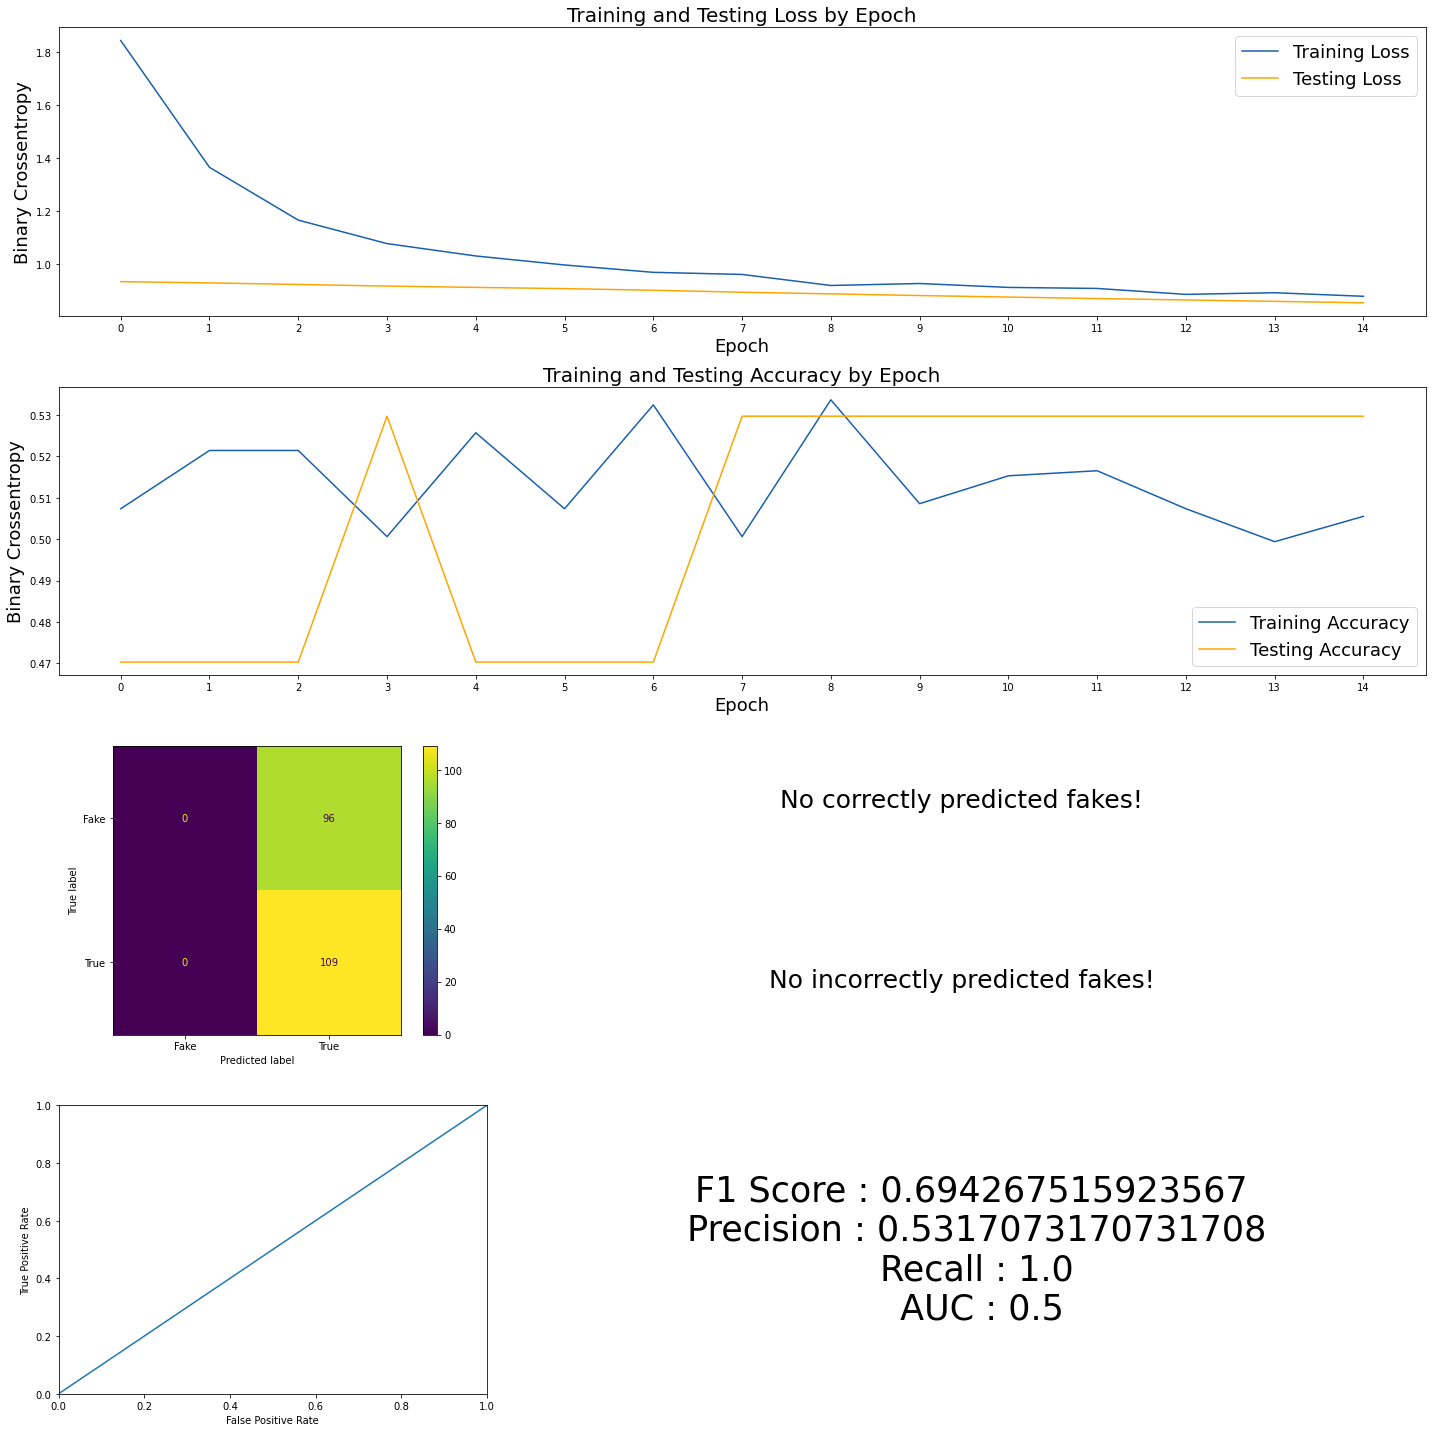

In [195]:
Universal().plot_results_duo(history_git,model_git,X_test,y_test)

As we can see, it didn't work well. Performance of the model decreased - it struggles to find any signal which it was able to catch before augmentations.
ROC AUC plot shows that model absolutely cannot differ on class from another. In other words they are totally overlapped. And testing set accuracy score is basically represents baseline accuracy.
  <p>So, second step would be to try some much deeper augmentations, like switching channel and color balance transformation - my goal is to find the proper set of technics to highlight the skewed parts of images to the model. 

----
#### 2nd approach
Deep augmentation

I'll create a function to get examples of different augmentations and run it through each type of fake images (easy, medium and hard). In theory, that will help to find the best set to highlight pixel structure skews to the model. For that purpose, I'll use ImgAug library. <p>For example, here is one of the images, that shows how proper augmentation can highlight "faked" part of the image.

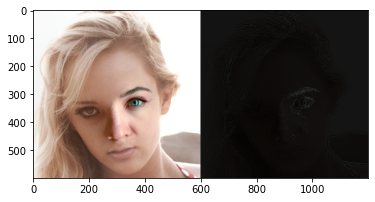

In [316]:
plt.imshow(np.hstack([np.asarray(Image.open("../data/real_and_fake_face/fake/easy_167_0110.jpg")),iaa.EdgeDetect(alpha=(0.8, 1.0)).augment_image(np.asarray(Image.open("../data/real_and_fake_face/fake/easy_167_0110.jpg")))]))

Creating method with all selected augmentations.

In [320]:
def augment_sample(images):
    # image=X_train[0]
    res=[]
    for num in range(len(images)):
        #adding initial image to the set for comparing purposes.
        res.append(images[num])
        #Randomize the order of channels
        res.append(iaa.ChannelShuffle(1).augment_image(images[num]))
        #Add noise sampled from gaussian distributions elementwise to images
        res.append(iaa.AdditiveGaussianNoise(scale=(100, 0.4*255)).augment_image(images[num]))
        #Inverts all values in images for 50% of cases.
        res.append(iaa.Invert(0.5).augment_image(images[num]))
        # This is the same as Invert, but sets a default threshold
        res.append(iaa.Solarize(0.8, threshold=40).augment_image(images[num]))
        #Degrade the quality of images by JPEG-compressing them.
        res.append(iaa.JpegCompression(compression=(98, 99)).augment_image(images[num]))
        # Convert each image to pure grayscale and alpha-blend the result with the original image
        res.append(iaa.BlendAlpha(0.5, iaa.Grayscale(1.0)).augment_image(images[num]))
        res.append(iaa.BlendAlphaSimplexNoise(iaa.EdgeDetect(1),upscale_method="nearest").augment_image(images[num]))
        # Apply a pyramidic mean shift filter
        res.append(iaa.MeanShiftBlur().augment_image(images[num]))
        # Adds a random augmentation
        res.append(iaa.RandAugment(n=2, m=9).augment_image(images[num]))
        # Increases or decreases hue and saturation by random values
        res.append(iaa.AddToHueAndSaturation((-100, 0), per_channel=True).augment_image(images[num]))
        # Modifies the contrast of images
        res.append(iaa.SigmoidContrast(gain=(2, 10), cutoff=(0.8, 0.9), per_channel=True).augment_image(images[num]))
        # Applies Contrast Limited Adaptive Histogram Equalization to images, transforms to a target colorspace
        # extracts an intensity-related channel ,and converts back to the original colorspace.
        res.append(iaa.AllChannelsCLAHE(clip_limit=(1, 9), per_channel=True).augment_image(images[num]))
        res.append(iaa.CLAHE().augment_image(images[num]))
        # Sharpens images and overlays the result with the original image
        res.append(iaa.Sharpen(alpha=(0.7, 1.0), lightness=(0.75, 1.5)).augment_image(images[num]))
        # Pronounces highlights and shadows
        res.append(iaa.Emboss(alpha=(0.0, 1.0), strength=(0.5, 1.5)).augment_image(images[num]))
        # Generate a black & white edge image and alpha-blend it with the input image
        res.append(iaa.EdgeDetect(alpha=(0.7, 1.0)).augment_image(images[num]))
        res.append(iaa.DirectedEdgeDetect(alpha=(0.95), direction=(0.1, 1.0)).augment_image(images[num]))
        
    return res

First, let's plot sample images.

<Figure size 432x288 with 0 Axes>

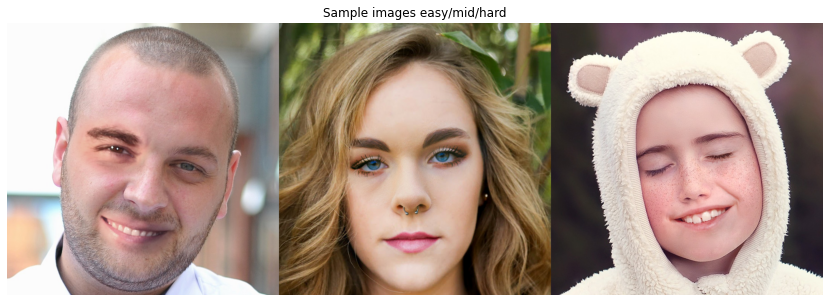

In [318]:
# method I've developed to get needed amount of samples for each type (hard/mid/easy) of fake image.
samples=Universal().generate_samples(1)
# plot of the results
plt.tight_layout()
plt.figure(figsize=(15,5))
plt.axis('off')
plt.title('Sample images easy/mid/hard')
plt.savefig("../resources/sample_images_e_m_h.jpg",bbox_inches = 'tight')
plt.imshow(np.hstack(samples))


Now let's plot augmentation samples.

In [321]:
r=augment_sample(samples)

Now let's run these three samples through all selected augmentations.


And plot all of the variations to adjust the best parameters for augmentation functions.

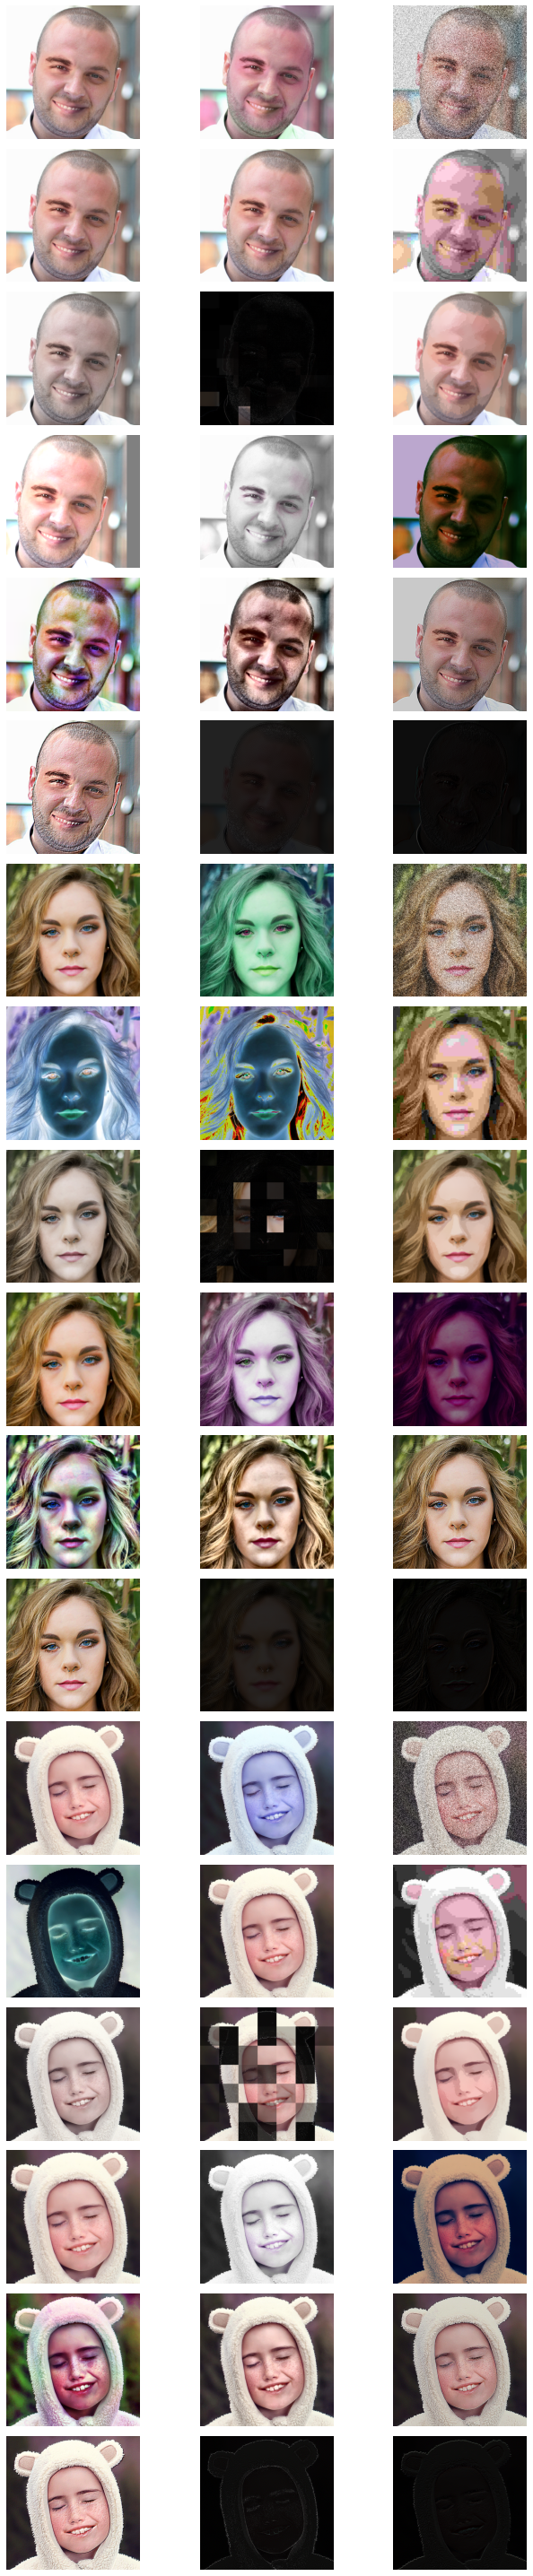

In [322]:
w = 10
h = 10
fig = plt.figure(figsize=(10, 40))
columns = 3
rows = 18
for i in range(1, columns*rows+1):
    img = r[i-1]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img)
plt.tight_layout()
plt.savefig("../resources/sample_images_augmented.jpg",bbox_inches = 'tight')
plt.show()

On this example we can see, that some of the technics are really effective at highlighting borders between fake and real image parts. Now I'll run my best model with augmented dataset.

----

In [326]:
# Augmentation library requires images in uint format.
data=X_train*255
images=data.astype(np.uint8)

In [327]:
# Sometimes(0.5, ...) applies the given augmenter in 50% of all cases. To add
sometimes = lambda aug: iaa.Sometimes(0.5, aug)

# Define our sequence of augmentation steps that will be applied to every image.
seq = iaa.Sequential(
  [
     # OneOf is the wrapping function that allows only one augmentation function to be used on each image. 
     # otherwise, after several transformation it image become a pixel mess.
iaa.OneOf([
            iaa.ChannelShuffle(1),
            iaa.Invert(0.5),
            iaa.BlendAlpha(0.5, iaa.Grayscale(1.0)),
            iaa.CLAHE(),  
            iaa.AdditiveGaussianNoise(scale=(100, 0.4*255)),
            iaa.Solarize(0.8, threshold=40),
            iaa.JpegCompression(compression=(98, 99)),
            iaa.BlendAlphaSimplexNoise(iaa.EdgeDetect(1),upscale_method="nearest"),
            iaa.MeanShiftBlur(),
            iaa.Sharpen(alpha=(0.7, 1.0), lightness=(0.75, 1.5)),
            iaa.Emboss(alpha=(0.0, 1.0), strength=(0.5, 1.5)),
            iaa.EdgeDetect(alpha=(0.7, 1.0)),
            iaa.AddToHueAndSaturation((-100, 0), per_channel=True),
            iaa.AllChannelsCLAHE(clip_limit=(1, 9), per_channel=True),
            iaa.SigmoidContrast(gain=(2, 10), cutoff=(0.8, 0.9), per_channel=True)
])         
    ],
    # do all of the above augmentations in random order
    random_order=True
)

In [ ]:
images_aug = seq(images=images)

Plot of the first 25 images in the randomly augmented image set.

<Figure size 432x288 with 0 Axes>

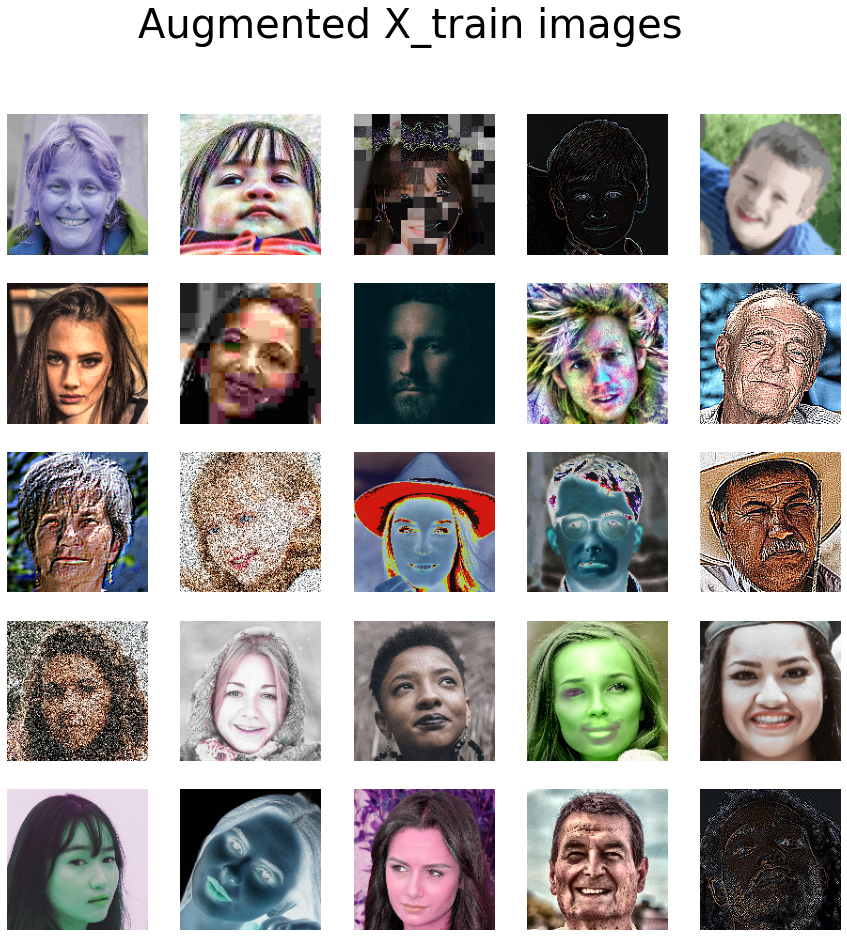

In [328]:
Universal().plot_samples(images_aug,25,5,"Augmented X_train","x_train_aug");

Adding augmented training set to the regular one.

In [286]:
# Scaling images back to 0-1 format
X_train_w_aug=np.concatenate((X_train,images_aug/255),axis=0)
# Label set hasn't been transformed, just doubling it to match new X_train
y_train_w_aug=np.concatenate((y_train,y_train),axis=0)

Building a model

In [287]:
model_git=Sequential([])
model_git.add(Conv2D(filters=8, kernel_size=(3, 3), padding='same', activation = 'relu',use_bias=True,input_shape = (150, 150, 3)))
model_git.add(BatchNormalization())
model_git.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_git.add(Conv2D(8, (5, 5), padding='same', activation = 'relu',use_bias=True))
model_git.add(BatchNormalization())
model_git.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_git.add(Conv2D(16, (5, 5), padding='same', activation = 'relu',use_bias=True))
model_git.add(BatchNormalization())
model_git.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_git.add(Conv2D(16, (5, 5), padding='same', activation = 'relu',use_bias=True))
model_git.add(BatchNormalization())
model_git.add(MaxPooling2D(pool_size=(4, 4), padding='same'))
model_git.add(Flatten())
model_git.add(Dropout(0.5))
model_git.add(Dense(16,kernel_regularizer =tf.keras.regularizers.l2(l=0.01)))
model_git.add(LeakyReLU(alpha=0.1))
model_git.add(Dropout(0.5))
model_git.add(Dense(1, activation = 'sigmoid'))
model_git.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])
history_git=model_git.fit(X_train_w_aug, y_train_w_aug, batch_size = 128, epochs = 25, verbose = 1, validation_data = (X_val, y_val))


Epoch 1/25


2022-11-11 16:24:07.959885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - ETA: 0s - loss: 1.4643 - acc: 0.4936

2022-11-11 16:24:13.241128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 6s 173ms/step - loss: 1.4643 - acc: 0.4936 - val_loss: 0.9774 - val_acc: 0.5396
Epoch 2/25
26/26 [==============================] - 2s 90ms/step - loss: 1.0688 - acc: 0.5061 - val_loss: 0.9671 - val_acc: 0.5099
Epoch 3/25
26/26 [==============================] - 2s 86ms/step - loss: 1.0186 - acc: 0.5251 - val_loss: 0.9529 - val_acc: 0.4802
Epoch 4/25
26/26 [==============================] - 2s 72ms/step - loss: 0.9915 - acc: 0.5073 - val_loss: 0.9307 - val_acc: 0.4950
Epoch 5/25
26/26 [==============================] - 2s 72ms/step - loss: 0.9487 - acc: 0.5251 - val_loss: 0.9195 - val_acc: 0.4851
Epoch 6/25
26/26 [==============================] - 2s 72ms/step - loss: 0.9281 - acc: 0.5272 - val_loss: 0.8886 - val_acc: 0.5000
Epoch 7/25
26/26 [==============================] - 2s 72ms/step - loss: 0.9023 - acc: 0.5490 - val_loss: 0.8715 - val_acc: 0.5198
Epoch 8/25
26/26 [==============================] - 2s 81ms/step - loss: 0.8813 - acc: 0.5477

Generating summary plot.

2022-11-10 14:58:24.114810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 29ms/step


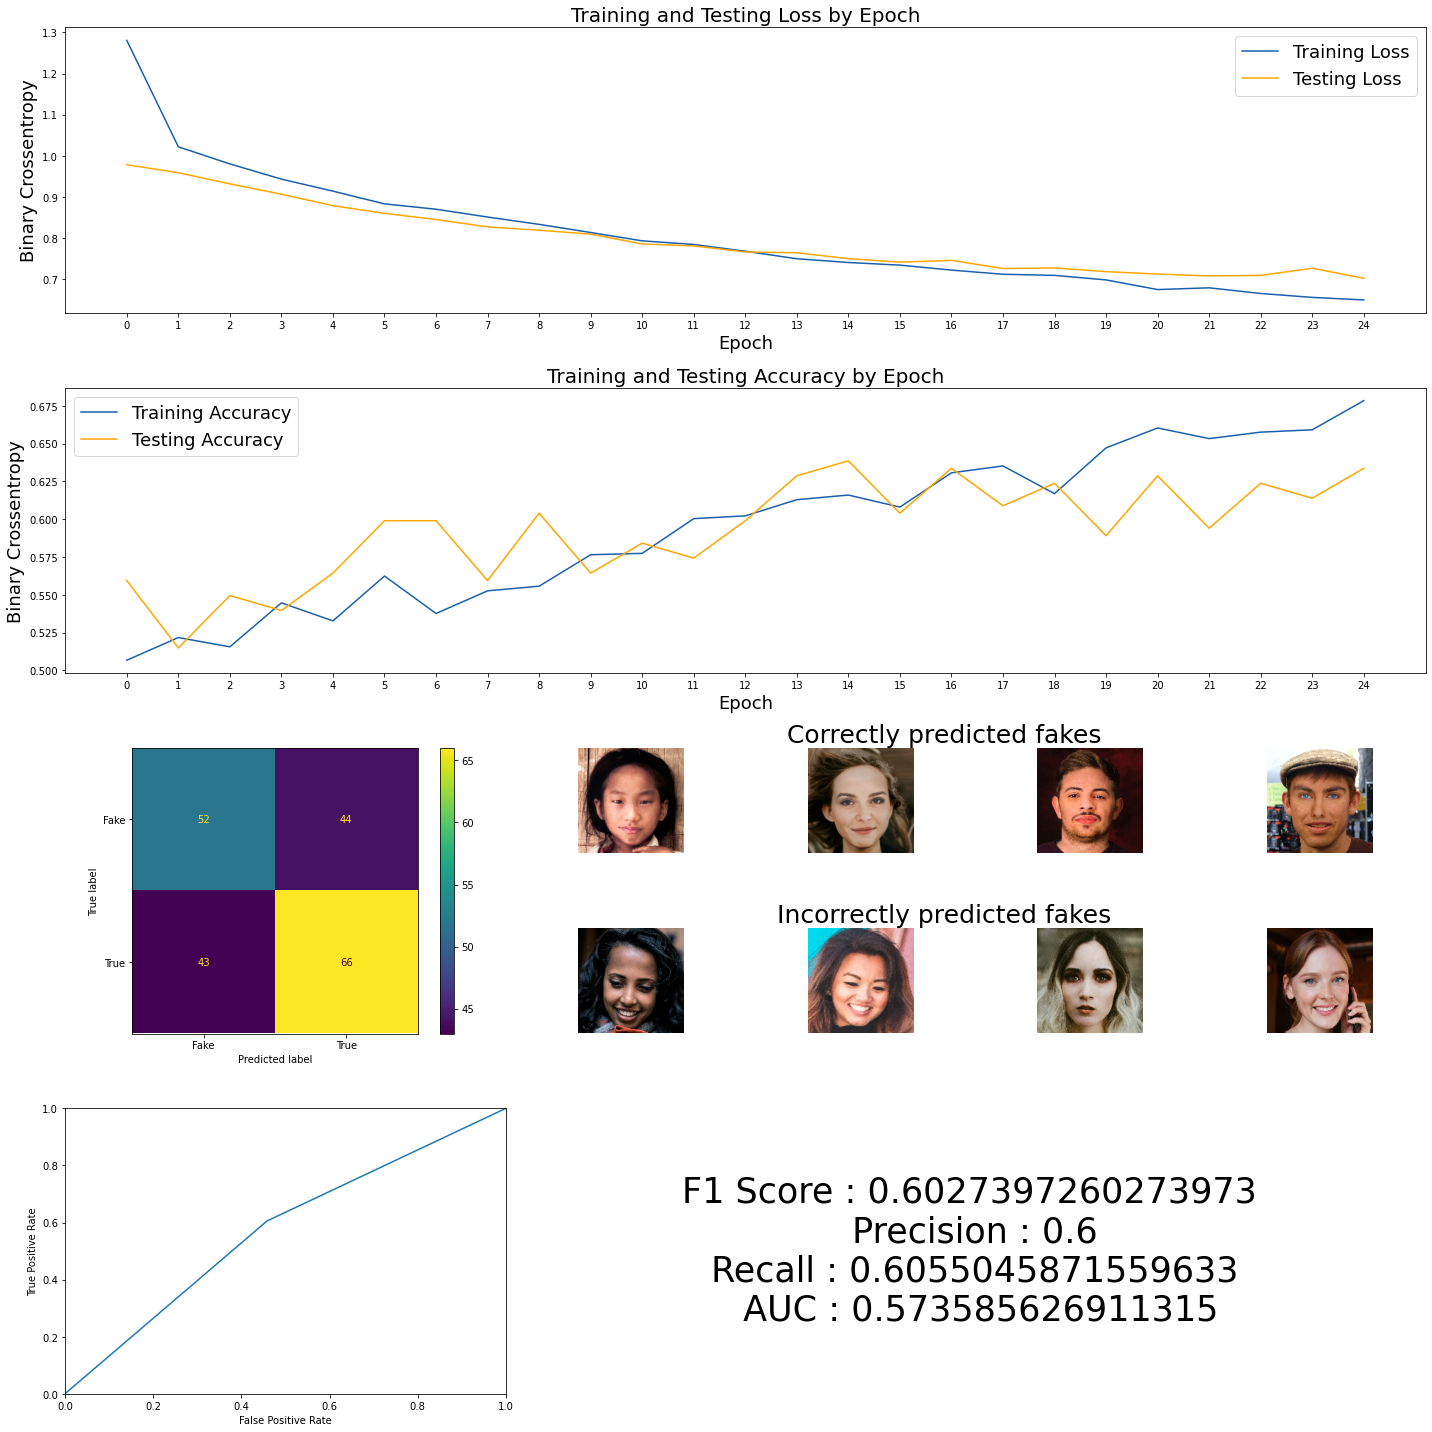

In [217]:
matches,mismatches,plot=Universal().plot_results_duo(history_git,model_git,X_test,y_test);

____
## EDA on results

Model summary shows:
1. We haven't reach any significant accuracy improvement of the model due to the augmentations.
2. Comparing examples of matches and mismatches, it is clear, that model is much better with "easy" and "medium" fakes and fails more on "hard" ones. And that is understandable - even human eye sometimes can not surely say if those are real or not. Evidence of pixel map deformation are not obvious.
3. ROC AUC. 0.5 would mean that "fake" and "real" classes are absolutely the same. 1 would say, that two classes are completely different and model can differentiate them. We have 0.57 - classes are extremely similar and overlapped for the model, but model is able to differ them. 
4. Despite these results, model definitely works and results are significantly higher than baseline. 
5. Training and testing accuracy scores look pretty good, model doesn't overfit, I'd say it is in a sweet spot. 

Let's dive deeper into layers of the model and try to find the reason of our results. First, I'll analyze matches (or correctly predicted images).

In [312]:
model_git.summary()

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_210 (Conv2D)         (None, 150, 150, 8)       224       
                                                                 
 batch_normalization_208 (Ba  (None, 150, 150, 8)      32        
 tchNormalization)                                               
                                                                 
 max_pooling2d_210 (MaxPooli  (None, 75, 75, 8)        0         
 ng2D)                                                           
                                                                 
 conv2d_211 (Conv2D)         (None, 75, 75, 8)         1608      
                                                                 
 batch_normalization_209 (Ba  (None, 75, 75, 8)        32        
 tchNormalization)                                               
                                                     

This is initial image that is send to the input layer.

(<matplotlib.image.AxesImage at 0x3d8f8a7c0>, 0.0)

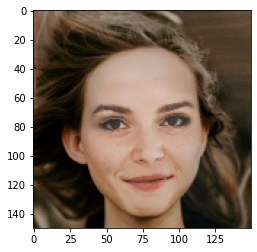

In [247]:
plt.imshow(X_test[matches[1]]),y_test[5]

Each convolution layer trying to find good features in image and pass it to the next layer.

1/1 [==============================] - 0s 192ms/step


2022-11-10 18:18:19.717922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

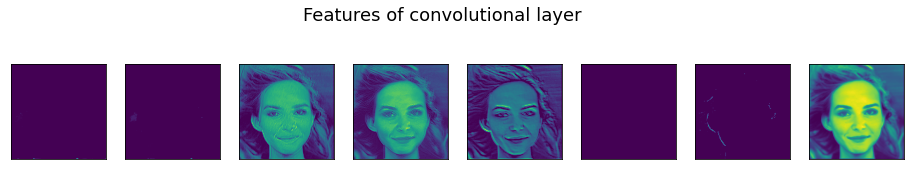

In [228]:
Universal().get_feat(model_git,X_test[matches[1]],layer_num=0,savename="model_aug_best_features_conv_0");

As image passes from layer to layer it changes due to max_pooling and feature extraction.

1/1 [==============================] - 0s 170ms/step


2022-11-10 18:19:18.513872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

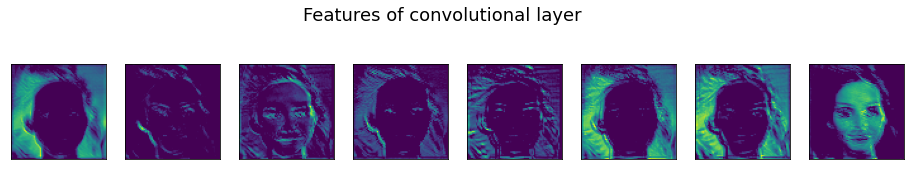

In [234]:
Universal().get_feat(model_git,X_test[matches[1]],layer_num=3,savename="model_aug_best_features_conv_3");

In the layers that are closer to the last, image may look completely different from the initial one. Especially in models with a lot of layers.

2022-11-10 18:19:28.585284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 443ms/step


<Figure size 432x288 with 0 Axes>

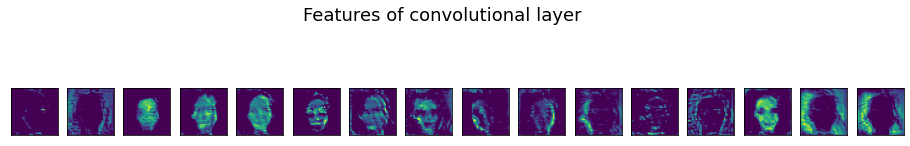

In [235]:
Universal().get_feat(model_git,X_test[matches[1]],layer_num=6,savename="model_aug_best_features_conv_6");

The final layer use all these generated features for classification.

2022-11-10 18:22:34.906284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 571ms/step


<Figure size 432x288 with 0 Axes>

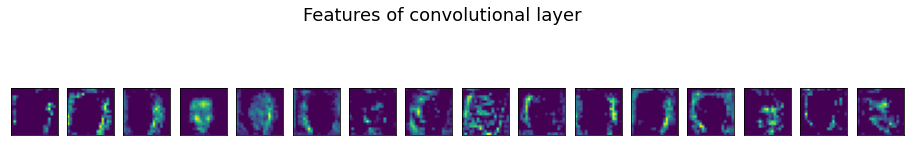

In [243]:
Universal().get_feat(model_git,X_test[matches[1]],layer_num=9,savename="model_aug_best_features_conv_9");

Visualizing feature output may be helpful to understand general principle of CNN work, although they won't be helpful at adjusting model parameters.

[<keras.layers.convolutional.conv2d.Conv2D object at 0x3821c5ee0>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x33dcdb0a0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x3821a6040>, <keras.layers.convolutional.conv2d.Conv2D object at 0x33dccd5b0>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x33d0cfeb0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x33dcdb070>, <keras.layers.convolutional.conv2d.Conv2D object at 0x33dcc0c10>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x33d0cca30>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x33d0b4520>, <keras.layers.convolutional.conv2d.Conv2D object at 0x3d8eb7f40>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x3d8eae820>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x3d8e91df0>, <keras.layers.reshaping.flatten.Flatten object at 0x34c4bc970>, <keras.layers.r

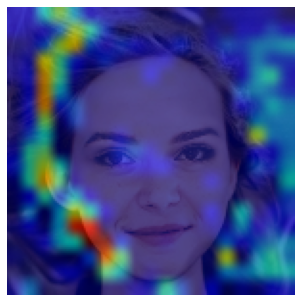

In [249]:
Universal().get_conv(model_git,X_test[matches[1]],"model_aug_git_grid");

Grad-Cam uses the gradient information flowing into the last convolutional layer of the CNN to understand each neuron for a decision of interest. Or, in English, it shows which parts of the image were the most useful for the model. 

----
EDA on Mismatch

This image is real, but it was predicted as fake.

(<matplotlib.image.AxesImage at 0x3364c0460>, 1.0)

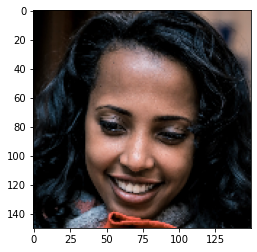

In [248]:
plt.imshow(X_test[mismatches[1]]),y_test[mismatches[1]]

1/1 [==============================] - 0s 195ms/step


2022-11-10 18:20:17.049844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


<Figure size 432x288 with 0 Axes>

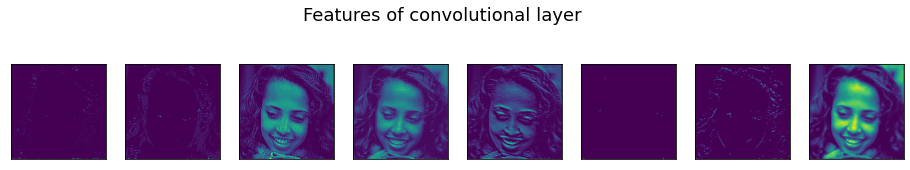

In [236]:
Universal().get_feat(model_git,X_test[mismatches[1]],0,savename="model_aug_best_features_conv_0_mismatch");

2022-11-10 18:21:51.761706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 284ms/step


<Figure size 432x288 with 0 Axes>

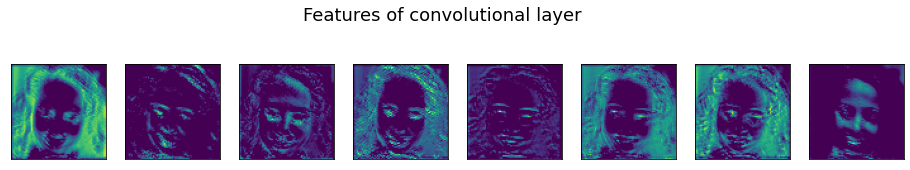

In [240]:
Universal().get_feat(model_git,X_test[mismatches[1]],3,savename="model_aug_best_features_conv_3_mismatch");

Same as with the correctly predicted image. Being sent from layer to layer image is changing.

2022-11-10 18:22:02.791444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 536ms/step


<Figure size 432x288 with 0 Axes>

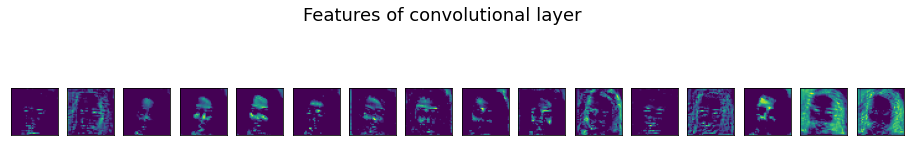

In [241]:
Universal().get_feat(model_git,X_test[mismatches[1]],6,savename="model_aug_best_features_conv_6_mismatch");

2022-11-10 18:22:15.530324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 435ms/step


<Figure size 432x288 with 0 Axes>

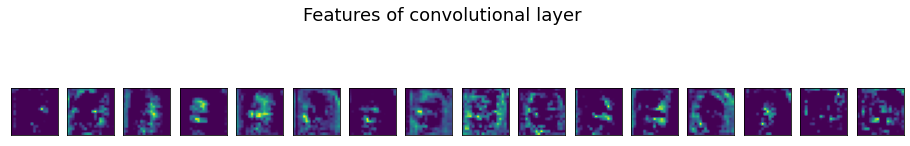

In [242]:
Universal().get_feat(model_git,X_test[mismatches[1]],9,savename="model_aug_best_features_conv_9_mismatch");

[<keras.layers.convolutional.conv2d.Conv2D object at 0x3821c5ee0>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x33dcdb0a0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x3821a6040>, <keras.layers.convolutional.conv2d.Conv2D object at 0x33dccd5b0>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x33d0cfeb0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x33dcdb070>, <keras.layers.convolutional.conv2d.Conv2D object at 0x33dcc0c10>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x33d0cca30>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x33d0b4520>, <keras.layers.convolutional.conv2d.Conv2D object at 0x3d8eb7f40>, <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x3d8eae820>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x3d8e91df0>, <keras.layers.reshaping.flatten.Flatten object at 0x34c4bc970>, <keras.layers.r

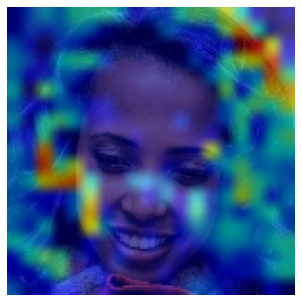

In [246]:
Universal().get_conv(model_git,X_test[mismatches[1]],"model_aug_git_grid_mismatch");

Grad-Cam shows, which image pieces model found and gave a resulting probability of "fake" class.
From my experience of work on this dataset, gradient stain located in those exact spots, where images have borders between "real" and "fake" pieces. 

---
Filters

This is filter set for the first Conv layer. Each column represent filters for each color channel.
The dark squares indicate small weights, light squares represent large weights. 

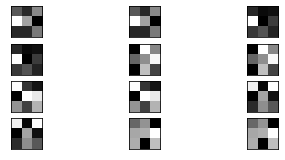

In [244]:
Universal().get_filters(model_git,0,savename="best_aug_model_filters")

----

Conclusion

Results of data augmentations are not obvious. Trying to detect fake images or fake part of images, we are trying to detect basically augmentations, with help of other augmentations I am applying to my dataset. So despite minor success with "easy" fakes and "mid" fakes, model summary shows, that "hard" fakes are still challenging for model. After dozens of iterations, I can say, that accuracy increase is inconsistent and reaches for 2-5 percents. Although, being applied to big data, this difference may play a significant role.